In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# setting master path
path = r'/Users/Norberto/Desktop/2023-10 Instacart Basket Analysis'

In [2]:
# read pkl files
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### Bar Graph

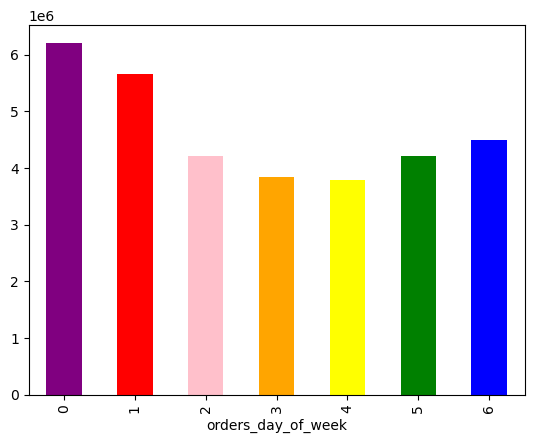

In [3]:
# create list of color names
rainbow = ['purple','red','pink','orange','yellow','green','blue']

# create bar chart and assign to variable
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=rainbow)

In [4]:
# save visualization to correct folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

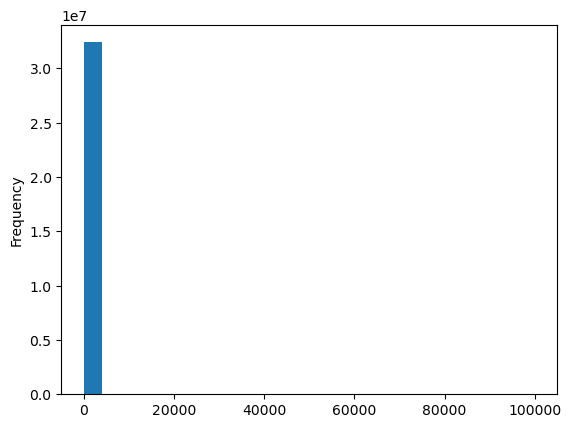

In [5]:
# view histogram of prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

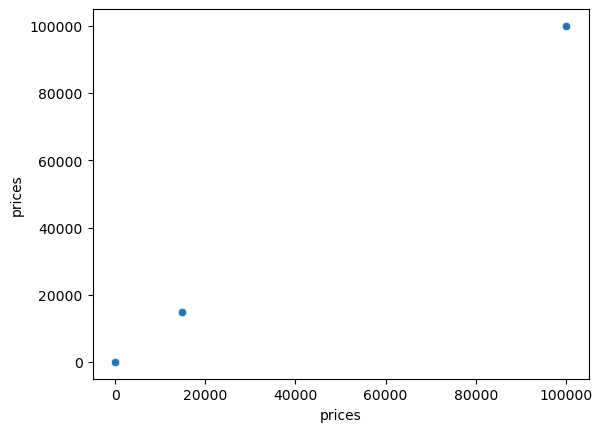

In [6]:
# show scatterplot to see outliers in prices column
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [7]:
# display rows with value in prices column above 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,Low Spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,Low Spender,5.0,Frequent customer
16534,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,Low Spender,12.0,Regular customer
16540,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,Low Spender,12.0,Regular customer
53712,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,Low Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,Low Spender,6.0,Frequent customer
32377867,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,Low Spender,12.5,Regular customer
32377877,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Least busy,Least busy,Fewest orders,25,Regular customer,170.073770,Low Spender,12.5,Regular customer
32410707,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,Low Spender,7.0,Frequent customer


In [8]:
# change values to NaN when above 100 in prices column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [9]:
# check max value in column to ensure none are above 100
ords_prods_merge['prices'].max()

25.0

### Histogram (cont.)

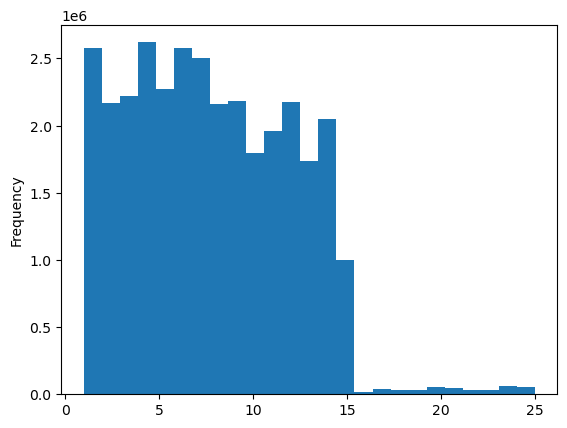

In [10]:
# create histogram with fixed prices
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

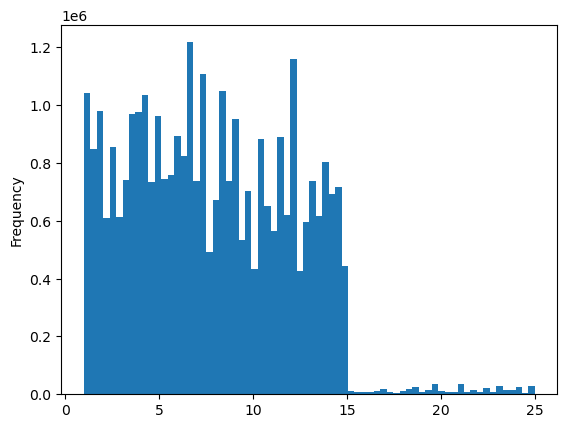

In [11]:
# made columns thinner by increasing number of bins
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [12]:
# save visualization to correct folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### SAMPLING

In [13]:
df = ords_prods_merge[:2000000]

In [14]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [17]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [18]:
print(len(ords_prods_merge))
print(len(big) + len(small))
print(len(big))
print(len(small))

32435059
32435059
22705099
9729960


### Line Charts

In [19]:
# create df with sample from full df and correct columns
df_2 = small[['orders_day_of_week','prices']]

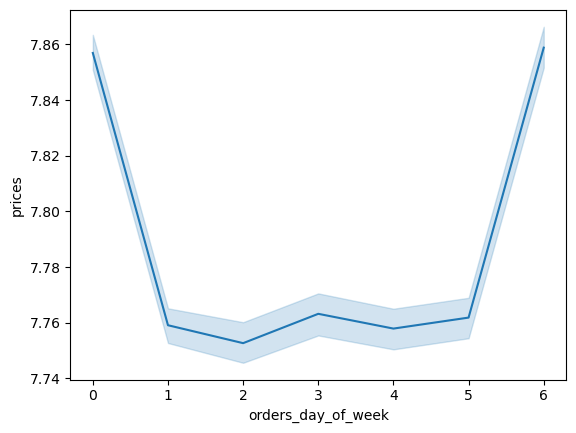

In [20]:
# make and assign line plot
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [21]:
# save visualization to correct folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

In [22]:
# Exporting pkl
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))